# Group project - Air Quality
---
## Cleaning


### Approach


#### Question/Aim:
 - compare before and after LEZ was enforced
 - compare inside and outside LEZ
 - look for trends over the 5 years - are emissions reducing anyway? - note that for numerical analysis 2020 and 2021 will have covid effects

#### Data/Data Sources:
 - enforcement for all started in june 2023 (except for those who live inside the zone - june 2024)
 - enforcemant for busses started in december 2018
 - 6 monitoring stations were chosen. 2 are inside the LEZ, the 4 outside are the closest stations the LEZ (1 on the border, 2 by very large roads, 1 that is hopefully comparable to inside LEZ)
 - nitrogen dioxide, PM10, PM2.5 (particles measured in micrometers)
 - 3 stations have all three, 2 have only NO2, 1 has only both PM
 - data is from the DEFRA Air Quality UK website
 - the process for downloading is described fully in project notes document
 - data is recorded hourly
 - each dataset is from one measuring station, is 5 years of data in length, with columns for date, time, and (pairs of) columns for emmisions concentrations

#### What is needed from cleaning:
 - want to look at various time intervals - time/date need to be filterable (datetime)
 - status columns are not needed (which just have units of measurement etc, always the same value) or the 'End' row
 - values need to be understood by the programs/ methods (proper null values, proper time values, proper data types)
 - consise column headings for readability

#### Steps:

Function to read in each dataset

- Read csv
- Skip first 10 rows, metadata


Function to clean dataset:

- Remove status columns
- Change no data to null
- Remove the 'End' row
- Change 24 to 00
- Change Time column to have just hours
- Change measurements to float/numeric
- Add in a datetime column
- Tidy up column headings

-- Start by cleaning Glasgow Townhead Dataset, with new code box for cleaning step

-- Then combine to make a general cleaning function

Function to save cleaned dataframe in a new file

Function to call these functions for each dataset/file

---
## Glasgow Townhead Dataset

This demonstrates the cleaning process on a sample dataset, with displays and prints to show the changes step by step.

In [ ]:
## Read in dataset
## skips 10 rows at point of reading in data - this removes the metadata and prevents an error

import pandas as pd
import numpy as np
from datetime import datetime

# to allow all the datasets to be checked:
#test_files_list = ['8536087138_glas_townhead.csv', '55033257_glas_anderston.csv', '55043359_glas_byres_rd.csv', '85360702557_glas_high_st.csv', '8536134593_glas_kerbside_NO2.csv', '85362384115_glas_gr_western_rd_NO2.csv']
#filename_townhead = test_files_list[2] # this index can be changed to test a different dataset

filename_townhead = '8536087138_glas_townhead.csv' #NOTE: this section should be returned to this dataset when other tests are done
url_townhead = 'https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/' + filename_townhead
townhead_df = pd.read_csv(url_townhead, skiprows = 10)

# show raw dataset summary
display(townhead_df.info(), townhead_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43849 entries, 0 to 43848
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Date                                        43849 non-null  object
 1   Time                                        43848 non-null  object
 2   Nitrogen dioxide                            43848 non-null  object
 3   Status                                      43848 non-null  object
 4   PM10 particulate matter (Hourly measured)   43848 non-null  object
 5   Status.1                                    43848 non-null  object
 6   PM2.5 particulate matter (Hourly measured)  43848 non-null  object
 7   Status.2                                    43848 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB


None

,Date,Time,Nitrogen dioxide,Status,PM10 particulate matter (Hourly measured),Status.1,PM2.5 particulate matter (Hourly measured),Status.2
0,2020-01-01,01:00:00,65.02707,V ugm-3,19.875,V ugm-3 (FIDAS),16.462,V ugm-3 (Ref.eq)
1,2020-01-01,02:00:00,56.86728,V ugm-3,26.325,V ugm-3 (FIDAS),22.123,V ugm-3 (Ref.eq)
2,2020-01-01,03:00:00,54.79366,V ugm-3,22.675,V ugm-3 (FIDAS),19.057,V ugm-3 (Ref.eq)
3,2020-01-01,04:00:00,54.3518,V ugm-3,20.55,V ugm-3 (FIDAS),17.123,V ugm-3 (Ref.eq)
4,2020-01-01,05:00:00,52.39739,V ugm-3,19.725,V ugm-3 (FIDAS),16.557,V ugm-3 (Ref.eq)
...,...,...,...,...,...,...,...,...
43844,2024-12-31,21:00:00,11.16148,P ugm-3,12.75,P ugm-3 (FIDAS),7.028,P ugm-3 (Ref.eq)
43845,2024-12-31,22:00:00,8.43086,P ugm-3,11.05,P ugm-3 (FIDAS),6.392,P ugm-3 (Ref.eq)
43846,2024-12-31,23:00:00,4.26333,P ugm-3,13.525,P ugm-3 (FIDAS),7.264,P ugm-3 (Ref.eq)
43847,2024-12-31,24:00:00,3.06582,P ugm-3,12.525,P ugm-3 (FIDAS),6.698,P ugm-3 (Ref.eq)


In [ ]:
## Remove status columns (adding units of measurement to column heading?)

# make a list of column headings
column_names = list(townhead_df.columns.values)
# to show the change add this before the drop code:
print("The columns before being cleaned: \n", column_names)
# make list of status columns, which are not needed
status_columns = []
for column_name in column_names:
  if 'Status' in column_name:
    status_columns.append(column_name)
print(status_columns)

# remove all the columns with Status in the name
townhead_df.drop(columns = status_columns, inplace = True)
# to show the change add this after the drop code:
print("The columns after being cleaned: \n", list(townhead_df.columns.values))

The columns before being cleaned: 
 ['Date', 'Time', 'Nitrogen dioxide', 'Status', 'PM10 particulate matter (Hourly measured)', 'Status.1', 'PM2.5 particulate matter (Hourly measured)', 'Status.2']
['Status', 'Status.1', 'Status.2']
The columns after being cleaned: 
 ['Date', 'Time', 'Nitrogen dioxide', 'PM10 particulate matter (Hourly measured)', 'PM2.5 particulate matter (Hourly measured)']


In [ ]:
## Change no data to null

# Replace 'No data' and 'No Data' with nan
townhead_df[townhead_df == "No data"] = np.nan
townhead_df[townhead_df == "No Data"] = np.nan

# to see if there is a change
# there was no change, because the datatype is still object
display(townhead_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43849 entries, 0 to 43848
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Date                                        43849 non-null  object
 1   Time                                        43848 non-null  object
 2   Nitrogen dioxide                            43386 non-null  object
 3   PM10 particulate matter (Hourly measured)   43636 non-null  object
 4   PM2.5 particulate matter (Hourly measured)  43636 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


None

In [ ]:
# following an error, this search found the 'No Data' values with a capital D
PM10_list = townhead_df.index[townhead_df['PM10 particulate matter (Hourly measured)'] == 'No Data'].tolist()
PM2_list = townhead_df.index[townhead_df['PM2.5 particulate matter (Hourly measured)'] == 'No Data'].tolist()
print(f'PM10: {PM10_list} \nPM2.5: {PM2_list}')

PM10: [] 
PM2.5: []




This error was generated while trying to convert to numeric values:

```

ValueError                                Traceback (most recent call last)

lib.pyx in pandas._libs.lib.maybe_convert_numeric()

ValueError: Unable to parse string "No data"


During handling of the above exception, another exception occurred:

ValueError                                Traceback (most recent call last)

<ipython-input-36-9fe39c50a05c> in <cell line: 0>()
      1 # change other datatypes - measurements to float/numeric
----> 2 townhead_df['Nitrogen dioxide'] = pd.to_numeric(townhead_df['Nitrogen dioxide'])
      3
      4 display(townhead_df.info(), townhead_df.head())

/usr/local/lib/python3.11/dist-packages/pandas/core/tools/numeric.py in to_numeric(arg, errors, downcast, dtype_backend)
    230         coerce_numeric = errors not in ("ignore", "raise")
    231         try:
--> 232             values, new_mask = lib.maybe_convert_numeric(  # type: ignore[call-overload]
    233                 values,
    234                 set(),

lib.pyx in pandas._libs.lib.maybe_convert_numeric()

ValueError: Unable to parse string "No data" at position 492


```
 This shows there *is* a 'No data' in this dataset and that the previous code bit didn't work


In [ ]:
# for the townhead dataset, we found where to
# check if the 'No data' to NaN works
display(townhead_df.iloc[490:495])

,Date,Time,Nitrogen dioxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured)
490,2020-01-21,11:00:00,32.90992,7.25,5.047
491,2020-01-21,12:00:00,35.23387,8.975,5.731
492,2020-01-21,13:00:00,NaN,NaN,NaN
493,2020-01-21,14:00:00,NaN,8.467,6.352
494,2020-01-21,15:00:00,38.71332,7,4.717


In [ ]:
## Remove row where Date is 'End'

# finding out about nulls in date and time columns
print('Before cleaning row:')
display(townhead_df.tail(3))
print('Any NaN in Date? ', townhead_df['Date'].isnull().values.any())
print('Any NaN in Time? ', townhead_df['Time'].isnull().values.any())

# this does what we need, and the check below shows date and time no longer have nulls - not sure if it is the most sensible way
townhead_df.drop(townhead_df.index[townhead_df['Date'] == 'End'], inplace = True)

# NOTE: (to remove when answered)
# two ways, wondering about differences:
#df.loc[df['line_race']==0].index, inplace=True
#df.index[df['line_race'] == 0], inplace = True

# checking for changes with nulls in date and time columns
print('After cleaning row:')
display(townhead_df.tail(3))
print('Any NaN in Date? ', townhead_df['Date'].isnull().values.any())
print('Any NaN in Time? ', townhead_df['Time'].isnull().values.any())

Before cleaning row:


,Date,Time,Nitrogen dioxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured)
43846,2024-12-31,23:00:00,4.26333,13.525,7.264
43847,2024-12-31,24:00:00,3.06582,12.525,6.698
43848,End,NaN,NaN,NaN,NaN


Any NaN in Date?  False
Any NaN in Time?  True
After cleaning row:


,Date,Time,Nitrogen dioxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured)
43845,2024-12-31,22:00:00,8.43086,11.05,6.392
43846,2024-12-31,23:00:00,4.26333,13.525,7.264
43847,2024-12-31,24:00:00,3.06582,12.525,6.698


Any NaN in Date?  False
Any NaN in Time?  False


In [ ]:
## Change 24:00:00 to 00:00:00
townhead_df.loc[townhead_df['Time'] == '24:00:00', 'Time'] = '00:00:00' # NOTE: I'm not sure why I need time the second time - check
display(townhead_df.iloc[21:48])

,Date,Time,Nitrogen dioxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured)
21,2020-01-01,22:00:00,15.78239,25.1,20.684
22,2020-01-01,23:00:00,18.74667,24.45,20.118
23,2020-01-01,00:00:00,20.89063,22.95,18.349
24,2020-01-02,01:00:00,17.78022,16.175,11.934
25,2020-01-02,02:00:00,11.58233,11.625,6.792
26,2020-01-02,03:00:00,11.19119,12.275,6.745
27,2020-01-02,04:00:00,10.16908,11.95,6.58
28,2020-01-02,05:00:00,8.99542,13.85,7.429
29,2020-01-02,06:00:00,9.30094,15.425,7.854
30,2020-01-02,07:00:00,11.75575,16.5,7.948


In [ ]:
## change time column to hours

townhead_df['Time'] = townhead_df['Time'].str.replace(':00:00', '')

display(townhead_df.head())

,Date,Time,Nitrogen dioxide,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured)
0,2020-01-01,01,65.02707,19.875,16.462
1,2020-01-01,02,56.86728,26.325,22.123
2,2020-01-01,03,54.79366,22.675,19.057
3,2020-01-01,04,54.3518,20.55,17.123
4,2020-01-01,05,52.39739,19.725,16.557


In [ ]:
## Change measurements to float/numeric

column_names = list(townhead_df.columns.values)
measurement_columns = column_names[2:]
print(measurement_columns)

for column in measurement_columns:
  townhead_df[column] = pd.to_numeric(townhead_df[column])

display(townhead_df.dtypes)

['Nitrogen dioxide', 'PM10 particulate matter (Hourly measured)', 'PM2.5 particulate matter (Hourly measured)']


,0
Date,object
Time,object
Nitrogen dioxide,float64
PM10 particulate matter (Hourly measured),float64
PM2.5 particulate matter (Hourly measured),float64


In [ ]:
## add a datetime column

def combine_date_time(df):
    if 'Date' in df.columns and 'Time' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
    return df

combine_date_time(townhead_df)

# to see the changed datatype
townhead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        43848 non-null  object        
 1   Time                                        43848 non-null  object        
 2   Nitrogen dioxide                            43386 non-null  float64       
 3   PM10 particulate matter (Hourly measured)   43636 non-null  float64       
 4   PM2.5 particulate matter (Hourly measured)  43636 non-null  float64       
 5   Datetime                                    43848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.0+ MB


In [ ]:
# to test column renames, drop column:

test_df = townhead_df.drop(columns = 'PM2.5 particulate matter (Hourly measured)')

# Remove possible extra spaces
test_df.columns = test_df.columns.str.strip()
# Rename columns for readability
test_df.rename(columns={
    'Nitrogen dioxide': 'NO2 (µg/m3)',
    'PM10 particulate matter (Hourly measured)': 'PM10 (µg/m3)',
    'PM2.5 particulate matter (Hourly measured)': 'PM2.5 (µg/m3)'
}, inplace=True)
display(test_df.columns.values)

# result of test is that the following code works fine, even if not all of the columns it wants to rename are there,
# it just ignores the missing column

array(['Date', 'Time', 'NO2 (µgm-3)', 'PM10 (µgm-3)', 'Datetime'],
      dtype=object)

In [ ]:
## Tidy up column headings  (Don't need to use IF to generalise for all datasets!)

# Remove possible extra spaces
townhead_df.columns = townhead_df.columns.str.strip()
# Rename columns for readability
townhead_df.rename(columns={
    'Nitrogen dioxide': 'NO2 (µg/m3)',
    'PM10 particulate matter (Hourly measured)': 'PM10 (µg/m3)',
    'PM2.5 particulate matter (Hourly measured)': 'PM2.5 (µg/m3)'
}, inplace=True)
display(townhead_df.columns.values)

array(['Date', 'Time', 'NO2 (µgm-3)', 'PM10 (µgm-3)', 'PM2.5 (µgm-3)',
       'Datetime'], dtype=object)

In [ ]:
display(townhead_df.info(), townhead_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           43848 non-null  object        
 1   Time           43848 non-null  object        
 2   NO2 (µgm-3)    43386 non-null  float64       
 3   PM10 (µgm-3)   43636 non-null  float64       
 4   PM2.5 (µgm-3)  43636 non-null  float64       
 5   Datetime       43848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.0+ MB


None

,Date,Time,NO2 (µgm-3),PM10 (µgm-3),PM2.5 (µgm-3),Datetime
0,2020-01-01,01,65.02707,19.875,16.462,2020-01-01 01:00:00
1,2020-01-01,02,56.86728,26.325,22.123,2020-01-01 02:00:00
2,2020-01-01,03,54.79366,22.675,19.057,2020-01-01 03:00:00
3,2020-01-01,04,54.35180,20.550,17.123,2020-01-01 04:00:00
4,2020-01-01,05,52.39739,19.725,16.557,2020-01-01 05:00:00
...,...,...,...,...,...,...
43843,2024-12-31,20,11.44888,9.850,5.896,2024-12-31 20:00:00
43844,2024-12-31,21,11.16148,12.750,7.028,2024-12-31 21:00:00
43845,2024-12-31,22,8.43086,11.050,6.392,2024-12-31 22:00:00
43846,2024-12-31,23,4.26333,13.525,7.264,2024-12-31 23:00:00


---
##  Testing the Cleaning Function

This demonstrates the full cleaning function on the sample dataset (Townhead), using the dataframe info, head and tail, and a section with 'No data' to show that the function works as expected.

Another dataset can also be substituted if we need to check any of the others.

Code was added here later, from the analysis stage, to plot the data and count null rows. This was used to find out if a dataset could be substituted for Byres road.

In [2]:
# so that each section has everything to work
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
# 2 - Function to clean the data as outlined above - version for test
def clean_df_test(df):

  ## Remove status columns
  # make a list of names of columns to remove
  column_names = list(df.columns.values)
  status_columns = []
  for column_name in column_names:
    if 'Status' in column_name:
      status_columns.append(column_name)
  # remove all the columns with Status in the name
  df.drop(columns = status_columns, inplace = True)

  ## Change 'No data' to nan
  df[df == "No data"] = np.nan
  df[df == "No Data"] = np.nan

  ## Remove last row in Date column, with 'End' value
  df.drop(df.index[df['Date'] == 'End'], inplace = True)

  ## Change 24:00:00 to 00:00:00
  df.loc[df['Time'] == '24:00:00', 'Time'] = '00:00:00'

  ## change time column to hours
  df['Time'] = df['Time'].str.replace(':00:00', '')

  ## Change measurements to float/numeric
  column_names = list(df.columns.values)
  measurement_columns = column_names[2:]
  for column in measurement_columns:
    df[column] = pd.to_numeric(df[column])

  ## add a datetime column
  if 'Date' in df.columns and 'Time' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

  ## Tidy up column headings
  # Remove possible extra spaces
  df.columns = df.columns.str.strip()
  # Rename columns for readability
  df.rename(columns={
      'Nitrogen dioxide': 'NO2 (µg/m3)',
      'PM10 particulate matter (Hourly measured)': 'PM10 (µg/m3)',
      'PM2.5 particulate matter (Hourly measured)': 'PM2.5 (µg/m3)'
  }, inplace=True)

  return df

In [4]:
## read in data - to test the full cleaning function
# here, the townhead dataframe is read in again to override the cleaned version

# to allow all the datasets to be checked
#test_files_list = ['8536087138_glas_townhead.csv', '55033257_glas_anderston.csv', '55043359_glas_byres_rd.csv', '85360702557_glas_high_st.csv', '8536134593_glas_kerbside_NO2.csv', '85362384115_glas_gr_western_rd_NO2.csv']
#filename_test = test_files_list[0] # this index can be changed to test a different dataset

#new_test_files_list = ['6548509_glas_broomhill.csv', '65521914_glas_burgher_st.csv', '65534616_glas_dumbarton_rd.csv', '6555328_glas_nithsdale_rd.csv']
#filename_test = new_test_files_list[2] # this index can be changed to test a different dataset

filename_test = '8536087138_glas_townhead.csv'  #NOTE: this section should be returned to this dataset when other tests are done
url_test = 'https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/' + filename_test
test_df = pd.read_csv(url_test, skiprows = 10)

# to show the data before cleaning
print('dataset before cleaning:')
# show raw dataset summary
display(test_df.info(), test_df)
# show the rows with 'No data', for the townhead dataset
display(test_df.iloc[490:495])


dataset before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43849 entries, 0 to 43848
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Date                                        43849 non-null  object
 1   Time                                        43848 non-null  object
 2   Nitrogen dioxide                            43848 non-null  object
 3   Status                                      43848 non-null  object
 4   PM10 particulate matter (Hourly measured)   43848 non-null  object
 5   Status.1                                    43848 non-null  object
 6   PM2.5 particulate matter (Hourly measured)  43848 non-null  object
 7   Status.2                                    43848 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB


None

,Date,Time,Nitrogen dioxide,Status,PM10 particulate matter (Hourly measured),Status.1,PM2.5 particulate matter (Hourly measured),Status.2
0,2020-01-01,01:00:00,65.02707,V ugm-3,19.875,V ugm-3 (FIDAS),16.462,V ugm-3 (Ref.eq)
1,2020-01-01,02:00:00,56.86728,V ugm-3,26.325,V ugm-3 (FIDAS),22.123,V ugm-3 (Ref.eq)
2,2020-01-01,03:00:00,54.79366,V ugm-3,22.675,V ugm-3 (FIDAS),19.057,V ugm-3 (Ref.eq)
3,2020-01-01,04:00:00,54.3518,V ugm-3,20.55,V ugm-3 (FIDAS),17.123,V ugm-3 (Ref.eq)
4,2020-01-01,05:00:00,52.39739,V ugm-3,19.725,V ugm-3 (FIDAS),16.557,V ugm-3 (Ref.eq)
...,...,...,...,...,...,...,...,...
43844,2024-12-31,21:00:00,11.16148,P ugm-3,12.75,P ugm-3 (FIDAS),7.028,P ugm-3 (Ref.eq)
43845,2024-12-31,22:00:00,8.43086,P ugm-3,11.05,P ugm-3 (FIDAS),6.392,P ugm-3 (Ref.eq)
43846,2024-12-31,23:00:00,4.26333,P ugm-3,13.525,P ugm-3 (FIDAS),7.264,P ugm-3 (Ref.eq)
43847,2024-12-31,24:00:00,3.06582,P ugm-3,12.525,P ugm-3 (FIDAS),6.698,P ugm-3 (Ref.eq)


,Date,Time,Nitrogen dioxide,Status,PM10 particulate matter (Hourly measured),Status.1,PM2.5 particulate matter (Hourly measured),Status.2
490,2020-01-21,11:00:00,32.90992,V ugm-3,7.25,V ugm-3 (FIDAS),5.047,V ugm-3 (Ref.eq)
491,2020-01-21,12:00:00,35.23387,V ugm-3,8.975,V ugm-3 (FIDAS),5.731,V ugm-3 (Ref.eq)
492,2020-01-21,13:00:00,No data,V ugm-3,No data,V ugm-3 (FIDAS),No data,V ugm-3 (Ref.eq)
493,2020-01-21,14:00:00,No data,V ugm-3,8.467,V ugm-3 (FIDAS),6.352,V ugm-3 (Ref.eq)
494,2020-01-21,15:00:00,38.71332,V ugm-3,7,V ugm-3 (FIDAS),4.717,V ugm-3 (Ref.eq)


In [5]:
# calling the cleaning function
test_cleaning_townshead = clean_df_test(test_df)

# to show the result of the cleaning
print('dataset after cleaning:')
display(test_cleaning_townshead, test_cleaning_townshead.info())
display(test_df.iloc[490:495])

dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           43848 non-null  object        
 1   Time           43848 non-null  object        
 2   NO2 (µg/m3)    43386 non-null  float64       
 3   PM10 (µg/m3)   43636 non-null  float64       
 4   PM2.5 (µg/m3)  43636 non-null  float64       
 5   Datetime       43848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.0+ MB


,Date,Time,NO2 (µg/m3),PM10 (µg/m3),PM2.5 (µg/m3),Datetime
0,2020-01-01,01,65.02707,19.875,16.462,2020-01-01 01:00:00
1,2020-01-01,02,56.86728,26.325,22.123,2020-01-01 02:00:00
2,2020-01-01,03,54.79366,22.675,19.057,2020-01-01 03:00:00
3,2020-01-01,04,54.35180,20.550,17.123,2020-01-01 04:00:00
4,2020-01-01,05,52.39739,19.725,16.557,2020-01-01 05:00:00
...,...,...,...,...,...,...
43843,2024-12-31,20,11.44888,9.850,5.896,2024-12-31 20:00:00
43844,2024-12-31,21,11.16148,12.750,7.028,2024-12-31 21:00:00
43845,2024-12-31,22,8.43086,11.050,6.392,2024-12-31 22:00:00
43846,2024-12-31,23,4.26333,13.525,7.264,2024-12-31 23:00:00


None

,Date,Time,NO2 (µg/m3),PM10 (µg/m3),PM2.5 (µg/m3),Datetime
490,2020-01-21,11,32.90992,7.250,5.047,2020-01-21 11:00:00
491,2020-01-21,12,35.23387,8.975,5.731,2020-01-21 12:00:00
492,2020-01-21,13,NaN,NaN,NaN,2020-01-21 13:00:00
493,2020-01-21,14,NaN,8.467,6.352,2020-01-21 14:00:00
494,2020-01-21,15,38.71332,7.000,4.717,2020-01-21 15:00:00


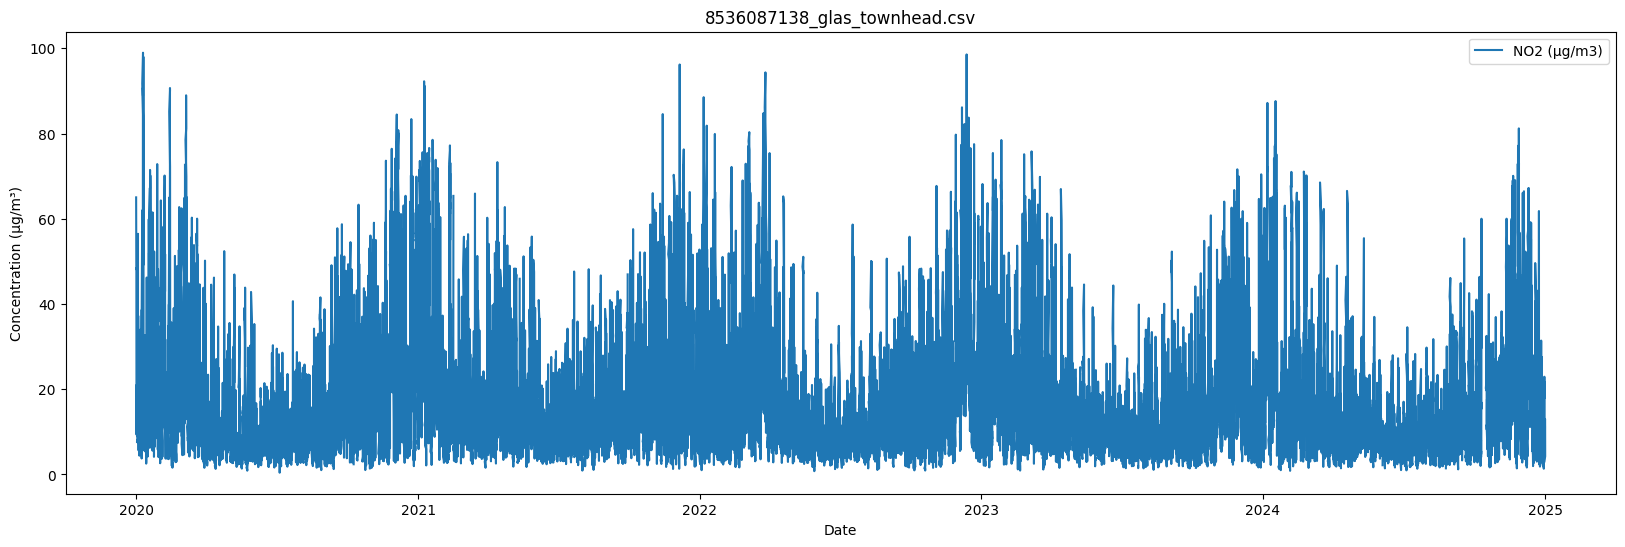

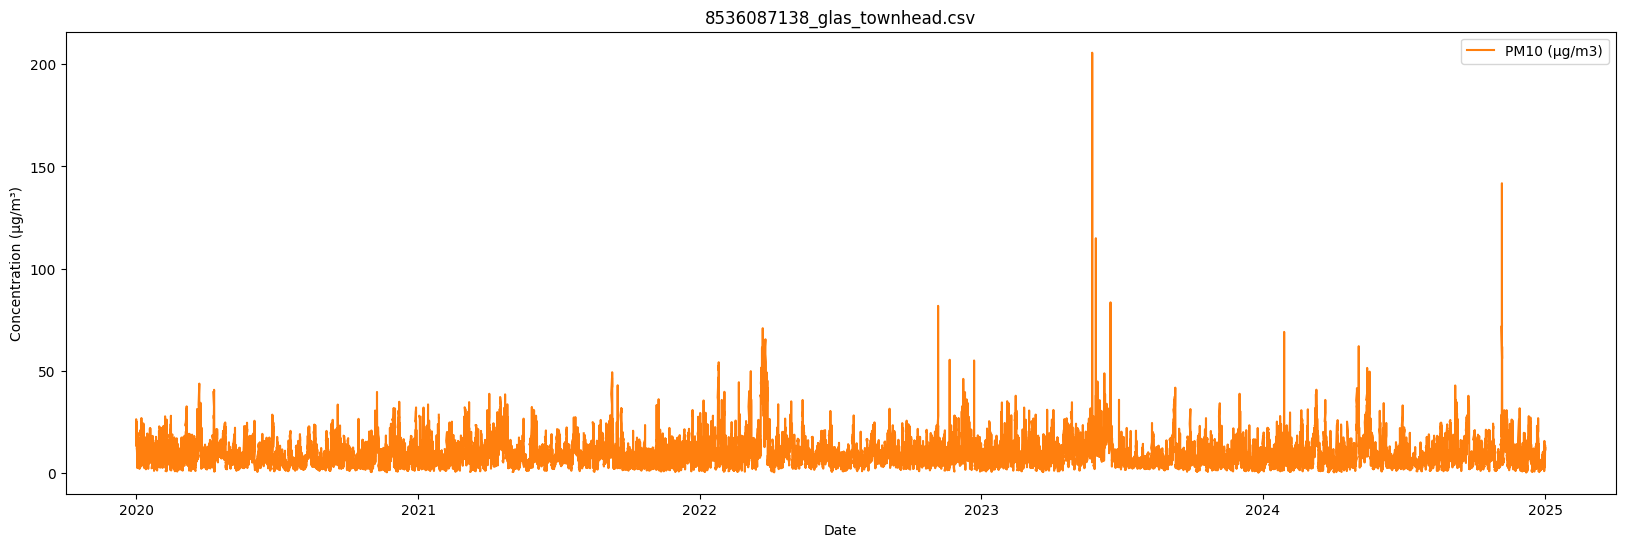

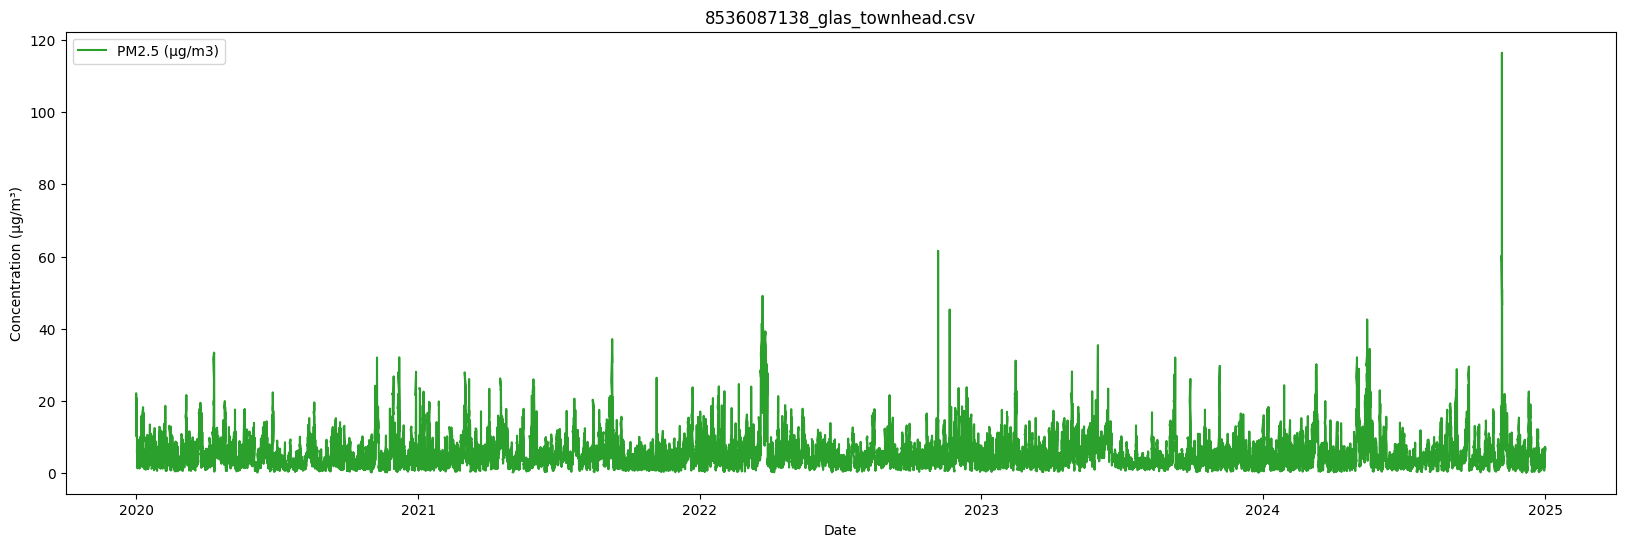

In [25]:
# Function to plot pollutant levels over time - graph to see what the data look like (adapted from analysis stage)
import matplotlib.pyplot as plt

def plot_time_series(df, filename):
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
  pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

  if pollutants:
    for pollutant in pollutants:
      if 'NO2' in pollutant:
        colour = 'tab:blue'
      if 'PM10' in pollutant:
        colour = 'tab:orange'
      if 'PM2.5' in pollutant:
        colour = 'tab:green'

      plt.figure(figsize=(20, 6)) # click on the graph to see full size
      plt.plot(df['Datetime'], df[pollutant], color=colour, label=pollutant)

      plt.title(f"{filename}")
      plt.xlabel("Date")
      plt.ylabel("Concentration (µg/m³)")
      plt.legend()
      plt.show()

# Run time series plots
#test_set = [test_df]
plot_time_series(test_df, filename_test)


In [13]:
# Function to check missing values in each dataset - to find out how much is really missing (adapted from analysis stage)
def check_null_values(df, filename):
  print(f" Checking missing values for {filename} dataset:")
  missing_values = df.isnull().sum()
  print(missing_values[missing_values > 0])  # Show only columns with missing values

# Create a dictionary of datasets
#datasets = {location: pd.read_csv(url) for location, url in urls.items()}

# Run the missing values check
check_null_values(test_df, filename_test)

 Checking missing values for 8536087138_glas_townhead.csv dataset:
NO2 (µg/m3)      462
PM10 (µg/m3)     212
PM2.5 (µg/m3)    212
dtype: int64


In [14]:
# Function to check percentage of missing values - to find out how much is really missing (adapted from analysis stage)
def check_null_percentage(df, filename):
  print(f" Missing data percentage in {filename} dataset:")
  missing_percent = (df.isnull().sum() / len(df)) * 100
  print(missing_percent[missing_percent > 0].round(2))  # Show only columns with missing values

# Run percentage check
check_null_percentage(test_df, filename_test)

 Missing data percentage in 8536087138_glas_townhead.csv dataset:
NO2 (µg/m3)      1.05
PM10 (µg/m3)     0.48
PM2.5 (µg/m3)    0.48
dtype: float64


---
## Functions

The four functions to load, clean and save the cleaned data





1 - Function to read in data
- read_file(filename)
- filename parameter: the name of the file to be read in
- reads in csv file from our github repository, removing the 10 metadata rows
- returns a dataframe

2 - Function to clean the data
- clean_df(df)
- df parameter: a dataframe to clean
- cleans the dataframe as described above
- returns a dataframe

3 - Function to save the cleaned dataframe in a new file
- save_file(df, filename)
- df parameter: a dataframe to save
- filename parameter: the name of the original file
- creates a new file name, converts to csv, downloads to download folder

4 - Function to call the other functions for each file
- pepare_data(file_name_list)
- takes a list of file names as a parameter
- calls each of the functions for each of the files in the list

(5 - the file name list and code to call the prepare_data function)

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files

In [10]:
# 1 - Function to read in file, removing the 10 metadata rows

def read_file(filename):
  url = 'https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/' + filename
  df = pd.read_csv(url, skiprows = 10)
  return df

In [11]:
# 2 - Function to clean the data as outlined above

def clean_df(df):

  ## Remove status columns
  # make a list of names of columns to remove
  column_names = list(df.columns.values)
  status_columns = []
  for column_name in column_names:
    if 'Status' in column_name:
      status_columns.append(column_name)
  # remove all the columns with Status in the name
  df.drop(columns = status_columns, inplace = True)

  ## Change 'No data' to nan
  df[df == "No data"] = np.nan
  df[df == "No Data"] = np.nan

  ## Remove last row in Date column, with 'End' value
  df.drop(df.index[df['Date'] == 'End'], inplace = True)

  ## Change 24:00:00 to 00:00:00
  df.loc[df['Time'] == '24:00:00', 'Time'] = '00:00:00'

  ## change time column to hours
  df['Time'] = df['Time'].str.replace(':00:00', '')

  ## Change measurements to float/numeric
  column_names = list(df.columns.values)
  measurement_columns = column_names[2:]
  for column in measurement_columns:
    df[column] = pd.to_numeric(df[column])

  ## add a datetime column
  if 'Date' in df.columns and 'Time' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

  ## Tidy up column headings
  # Remove possible extra spaces
  df.columns = df.columns.str.strip()
  # Rename columns for readability
  df.rename(columns={
      'Nitrogen dioxide': 'NO2 (µg/m3)',
      'PM10 particulate matter (Hourly measured)': 'PM10 (µg/m3)',
      'PM2.5 particulate matter (Hourly measured)': 'PM2.5 (µg/m3)'
  }, inplace=True)

  return df

In [12]:
# 3 - Function to save the cleaned dataframe in a new file

def save_file(df, filename):
  try:
    new_filename = 'Cleaned_' + filename
    # saves as csv within notebook
    df.to_csv(new_filename, index=False)
    # downloads to computer's downloads folder
    files.download(new_filename)
    print(f' {new_filename} saved successfully')
  except:
    print(f'There was an error when trying to save {new_filename}')


In [13]:
# 4 - Function to call the other fuctions for each file

def prepare_data(file_name_list):
  for file in file_name_list:
    # take each file, calling function 1 to read in the data as a dataframe:
    file_df = read_file(file)
    # takes this dataframe, calling function 2 to clean the dataframe:
    cleaned_df = clean_df(file_df)
    # calls function 3 to save the dataframe as a new file:
    save_file(cleaned_df, file)


In [14]:
# 5 - file names list and calling function 4 - please run only if needed, in case it makes a mess!

air_quality_files = ['8536087138_glas_townhead.csv']#, '55033257_glas_anderston.csv', '55043359_glas_byres_rd.csv', '85360702557_glas_high_st.csv', '8536134593_glas_kerbside_NO2.csv', '85362384115_glas_gr_western_rd_NO2.csv']
#prepare_data(air_quality_files)    # keep this commented out - prevent unwanted downloads!

#new_air_quality_files = ['6548509_glas_broomhill.csv'] #, '65521914_glas_burgher_st.csv', '65534616_glas_dumbarton_rd.csv', '6555328_glas_nithsdale_rd.csv']
#prepare_data(new_air_quality_files)    # keep this commented out - prevent unwanted downloads!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Cleaned_6548509_glas_broomhill.csv saved successfully


---
## Next steps

#### Uploading the data:

The cleaned files are saved to the computer's downloads folder, and then uploaded to the project's Github repository, so they are available for the analysis stage.

#### Nulls:

The null data in the measurements columns was not removed in order to include all the dates/times - for plots and to see gaps in data recording.

Dealing with the null values will be done as needed in the next stages, starting by checking the data for null values in the analysis step.

#### Reshaping/joining:

Reshaping will also be decided by what steps are needed in the analysis stage.